In [107]:
import pandas as pd
from src.game_data_pipeline import Game_Data_Pipeline
from src.generate_topics import Topic_Model
import matplotlib.pyplot as plt
from scipy.spatial.distance import cosine
import numpy as np

%matplotlib inline

In [12]:
TM = Topic_Model('./data')
TM.load_feature_matrix()
TM.load_topics_csv()

In [11]:
TM.feature_matrix.columns

Index([u'Abstract Strategy', u'Acting', u'Action / Dexterity',
       u'Action / Movement Programming', u'Action Point Allowance System',
       u'Adventure', u'Age of Reason', u'American Civil War',
       u'American Indian Wars', u'American Revolutionary War',
       ...
       u'Voting', u'Wargame', u'Word Game', u'Worker Placement',
       u'World War I', u'World War II', u'Zombies', u'averageweight',
       u'minplayers', u'maxplayers'],
      dtype='object', length=136)

In [105]:
cluster_games = pd.DataFrame(TM.cluster_games())

> /Users/danamkaplan/galvanize/the-missing-piece/src/generate_topics.py(112)cluster_games()
-> if add_cluster_to_df:
(Pdb) self.df
*** AttributeError: 'Topic_Model' object has no attribute 'df'
(Pdb) self.feature_matrix.head()
     Abstract Strategy  Acting  Action / Dexterity  \
ids                                                  
1                  0.0     0.0                 0.0   
2                  0.0     0.0                 0.0   
3                  1.0     0.0                 0.0   
4                  0.0     0.0                 0.0   
5                  0.0     0.0                 0.0   

     Action / Movement Programming  Action Point Allowance System  Adventure  \
ids                                                                            
1                              0.0                            0.0        0.0   
2                              0.0                            0.0        0.0   
3                              0.0                            0.0        0

BdbQuit: 

In [20]:
w = pd.DataFrame(TM.W)

In [22]:
w.shape

(87726, 47)

In [36]:
cluster_games.rename({0:'topic', 1:'game_id'}, axis=1, inplace=True)

In [39]:
# adding topic to 
df = TM.feature_matrix.merge(cluster_games, left_index=True, right_on='game_id')

In [108]:
test = TM.cluster_games(add_cluster_to_df=True)

In [109]:
test.head()

,Abstract Strategy,Acting,Action / Dexterity,Action / Movement Programming,Action Point Allowance System,Adventure,Age of Reason,American Civil War,American Indian Wars,American Revolutionary War,...,Wargame,Word Game,Worker Placement,World War I,World War II,Zombies,averageweight,minplayers,maxplayers,topic
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,4.3473,3.0,5.0,3
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.9423,3.0,4.0,1
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.5089,2.0,4.0,1
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.6667,2.0,4.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,2.5109,3.0,6.0,1


1. Compute clustering algorithm (e.g., k-means clustering) for different values of k. For instance, by varying k from 1 to 10 clusters
2. For each k, calculate the total within-cluster sum of square (wss)
3. Plot the curve of wss according to the number of clusters k.
4. The location of a bend (knee) in the plot is generally considered as an indicator of the appropriate number of clust

In [60]:
centroids

,Abstract Strategy,Acting,Action / Dexterity,Action / Movement Programming,Action Point Allowance System,Adventure,Age of Reason,American Civil War,American Indian Wars,American Revolutionary War,...,Voting,Wargame,Word Game,Worker Placement,World War I,World War II,Zombies,averageweight,minplayers,maxplayers
topic,,,,,,,,,,,,,,,,,,,,,
0,0.029782,0.005205,0.013734,0.046263,0.160908,0.142981,0.002169,0.001735,0.001157,0.001157,...,0.029926,0.190690,0.001446,0.031661,0.007229,0.028625,0.040769,1.486912,1.961399,5.921787
1,0.033244,0.005114,0.030338,0.004068,0.016855,0.019296,0.001976,0.000232,0.000116,0.000465,...,0.005231,0.007207,0.026386,0.026037,0.000581,0.003255,0.002673,0.681727,2.035685,6.522260
2,0.121033,0.002656,0.008786,0.009876,0.048086,0.009740,0.010693,0.020297,0.002180,0.004359,...,0.009127,0.349339,0.020638,0.031740,0.017028,0.126005,0.007628,2.616227,1.947350,4.301389
3,0.025837,0.007649,0.031617,0.004080,0.007989,0.000000,0.000170,0.000850,0.000510,0.000170,...,0.011049,0.012069,0.050484,0.003910,0.002380,0.000000,0.009859,0.391075,2.082781,6.269590
4,0.023107,0.013479,0.025674,0.024390,0.062259,0.962131,0.000000,0.001926,0.001926,0.002567,...,0.005135,0.050706,0.001926,0.010270,0.001284,0.006418,0.014121,0.875738,1.774711,4.693838
5,0.010628,0.000332,0.017270,0.069412,0.155430,0.042511,0.017270,0.027898,0.015942,0.018598,...,0.000000,0.617735,0.000332,0.000996,0.032879,0.138824,0.012288,0.601223,1.815012,8.326802
6,0.138595,0.005153,0.016816,0.015731,0.050176,0.030377,0.004882,0.012476,0.001627,0.005153,...,0.015731,0.200163,0.010306,0.025224,0.013832,0.057228,0.019528,0.768798,1.832113,4.553024
7,0.010930,0.135280,0.092815,0.003763,0.001613,0.002867,0.000000,0.000179,0.000000,0.000179,...,0.089590,0.002509,0.123275,0.001254,0.000179,0.000538,0.004121,0.516449,2.770650,11.423759
8,0.037255,0.000654,0.033333,0.035948,0.030065,0.039216,0.007843,0.025490,0.001307,0.016993,...,0.001961,0.423529,0.001307,0.009150,0.068627,0.173856,0.001307,1.050678,1.877124,3.918301


In [61]:
df_centroid = df.merge(centroids, right_index=True, left_on='topic')

In [80]:
distances.shape

(8603,)

In [114]:
# generate topics in range of like 20 - 50
# cluster games to highest topic weight

#use computer_cluster_distance for every k

#plot cluster distance against k

def compute_cluster_distance(df, k):
    centroids = df.groupby('topic').mean()
    cluster_error = []
    for i in range(k):
        only_topic = df[df['topic']==i]
        cluster_error.append(only_topic.drop('topic', axis=1).apply(lambda x: cosine(x, centroids.loc[i]), axis=1).sum())
        
    return np.mean(np.array(cluster_error))

def analyze_cluster_by_k(min, max):
    errors = []
    for k in range(min, max+1):
        TM.generate_topics(k)
        df = TM.cluster_games(add_cluster_to_df=True)
        distance = compute_cluster_distance(df, k)
        errors.append((k, distance))
        
    return errors

ValueError: setting an array element with a sequence.

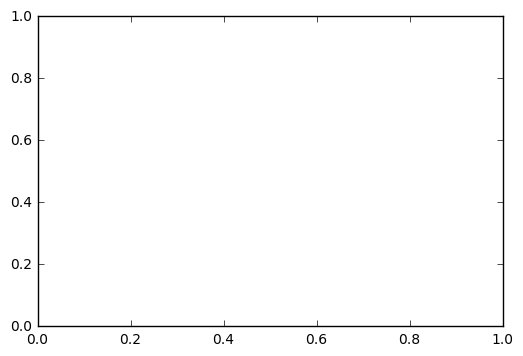

In [122]:
test = analyze_cluster_by_k(20, 50)
plt.plot(*zip(*test))

[(20, 563.2633924036387),
 (21, 541.1892976118909),
 (22, 484.23558527245586),
 (23, 456.2344109278437),
 (24, 435.7041012749119),
 (25, 418.3531090615718),
 (26, 399.8544521859564),
 (27, 385.86025160016067),
 (28, 372.0481304098153),
 (29, 359.56457713373237),
 (30, 347.57531067374777),
 (31, 338.10090543638086),
 (32, 329.09499482996046),
 (33, 320.88786210992754),
 (34, 309.1682593999564),
 (35, 301.45558913712404),
 (36, 294.056418111559),
 (37, 284.307002141364),
 (38, 293.000745950121),
 (39, 274.10620837341474),
 (40, 269.207426875818),
 (41, 258.41861524855005),
 (42, 283.2672820640382),
 (43, array([274.444747, 274.444747, 274.444747, 274.444747, 274.444747,
         274.444747, 274.444747, 274.444747, 274.444747, 274.444747,
         274.444747, 274.444747, 274.444747, 274.444747, 274.444747,
         274.444747, 274.444747, 274.444747, 274.444747, 274.444747,
         274.444747, 274.444747, 274.444747, 274.444747, 274.444747,
         274.444747, 274.444747, 274.444747, 27

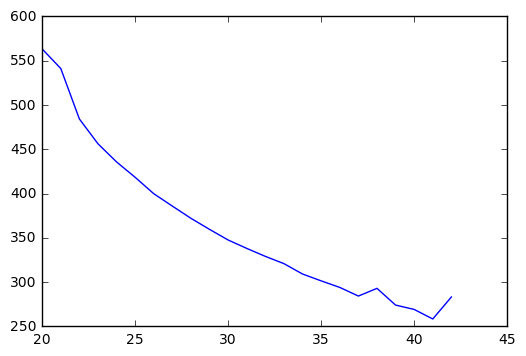

In [135]:
plt.plot(*zip(*test[:23]))
test

In [136]:
len([223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289,
         223.52141289, 223.52141289, 223.52141289, 223.52141289])


136

In [ ]:
def squash(x):
    if type(x) ==